Importar librerías que van a utilizarse

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Datos del FP 20 #18
Se crea un dataframe de la hoja de excel "Appol Datos"
y visualizamos los primeros registros

In [2]:
# Método read_excel de la librería de 'pandas' para crear el dataframe a partir de una tabla de excel
df_appol = pd.read_excel("Appol Datos.xlsx")
# [df].head(n) para visualizar los primeros 'n' registros del dataframe
df_appol.head(10)

,Periodo,Tipo Producto,Region,Ingresos,Gastos,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Q1 2019,Accesorios,AGO - África/Angola,66319.703782,56708.152509,NaN,NaN,NaN,NaN,NaN
1,Q1 2019,Aplicaciones,AGO - África/Angola,122357.282946,77039.770744,NaN,NaN,NaN,NaN,NaN
2,Q1 2019,Celulares,AGO - África/Angola,265278.815126,215226.208498,NaN,NaN,NaN,NaN,NaN
3,Q1 2019,Musica,AGO - África/Angola,130447.020661,86964.680441,NaN,NaN,NaN,NaN,NaN
4,Q1 2019,PC,AGO - África/Angola,394602.237500,326567.368966,NaN,NaN,NaN,NaN,NaN
5,Q1 2019,Tablets,AGO - África/Angola,81152.131105,69217.994178,NaN,NaN,NaN,NaN,NaN
6,Q1 2019,TV,AGO - África/Angola,44777.558865,28193.277804,NaN,NaN,NaN,NaN,NaN
7,Q1 2019,Accesorios,ARG - América/Argentina,88128.954459,73914.606966,NaN,NaN,NaN,NaN,NaN
8,Q1 2019,Aplicaciones,ARG - América/Argentina,135405.128280,73857.342698,NaN,NaN,NaN,NaN,NaN
9,Q1 2019,Celulares,ARG - América/Argentina,464439.590000,417526.500101,NaN,NaN,NaN,NaN,NaN


### Información del dataframe

In [9]:
# Eliminamos previamente las columnas sin nombres con [df].drop()
df_appol = df_appol.drop(['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'], axis=1)
# [df].info() para obtener información del dataframe
df_appol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4704 entries, 0 to 4703
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Periodo        4704 non-null   object 
 1   Tipo Producto  4704 non-null   object 
 2   Region         4704 non-null   object 
 3   Ingresos       4704 non-null   float64
 4   Gastos         4704 non-null   float64
dtypes: float64(2), object(3)
memory usage: 183.9+ KB


### Tratamiento de registros nulos y duplicados
Se busca encontrar los registos nulos y quitarlos, de ser neceraio.

In [10]:
# [df].isnull().sum() para revisar los campos numéricos nulos
columnas_numericas = ['Ingresos', 'Gastos']
df_appol[columnas_numericas].isnull().sum()
print("Campos numéricos nulos:")
print(df_appol[columnas_numericas].isnull().sum())

Campos numéricos nulos:
Ingresos    0
Gastos      0
dtype: int64


Como no hay registros nulos solo se busca eliminar duplicados

In [11]:
# [df].drop_duplicates() elimina los registros duplicados
df_appol_limpio = df_appol.drop_duplicates()

print(f"Cantidad de registros después de limpiar: {df_appol_limpio.shape[0]}")

Cantidad de registros después de limpiar: 4704


Significa que el dataframe original no contiene nulos ni duplicados,
por tanto se anula el paso final de crar un csv con los datos sin nulos
ni puplicados.

### Valores Atípicos.

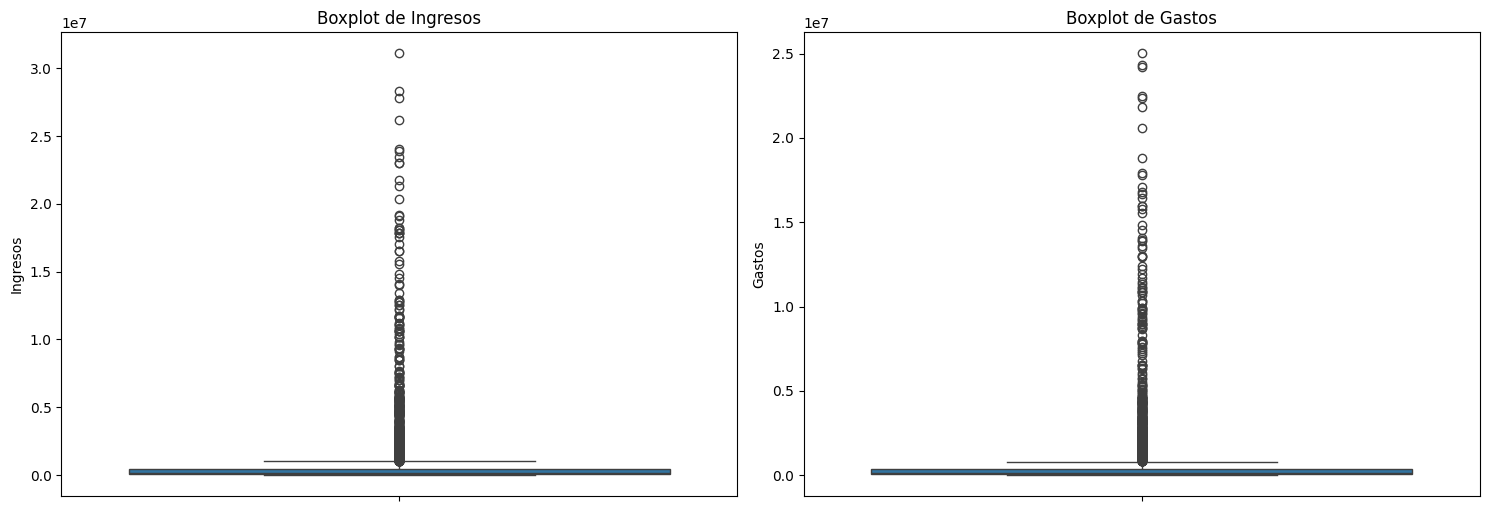

In [12]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(columnas_numericas):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=df_appol_limpio[col])
    plt.title(f"Boxplot de {col}")

plt.tight_layout()
plt.show()

### Datos estadísticos de las variables numéricas.
Media aritmética, desviación estandar, valor máximo, valor mínimo,
moda, mediana, percentiles 10, 25, 75, 90.

In [13]:
stats = df_appol_limpio[columnas_numericas].describe().T
stats['std'] = df_appol_limpio[columnas_numericas].std()
stats['maximo'] = df_appol_limpio[columnas_numericas].idxmax()
stats['minimo'] = df_appol_limpio[columnas_numericas].idxmin()
stats['mode'] = df_appol_limpio[columnas_numericas].mode().iloc[0]
stats['median'] = df_appol_limpio[columnas_numericas].median()
stats['10%'] = df_appol_limpio[columnas_numericas].quantile(0.10)
stats['25%'] = df_appol_limpio[columnas_numericas].quantile(0.25)
stats['75%'] = df_appol_limpio[columnas_numericas].quantile(0.75)
stats['90%'] = df_appol_limpio[columnas_numericas].quantile(0.90)

print("Datos estadísticos de las columnas numéricas:")
print(stats)

Datos estadísticos de las columnas numéricas:
           count           mean           std          min           25%  \
Ingresos  4704.0  715015.775340  2.133173e+06  6571.491561  57200.740101   
Gastos    4704.0  572347.939597  1.777783e+06  3765.600144  42040.915300   

                    50%            75%           max  maximo  minimo  \
Ingresos  150751.334835  438862.328578  3.108754e+07    2713    4703   
Gastos    111326.049532  346960.308790  2.501593e+07    2713    3618   

                  mode         median           10%           90%  
Ingresos  30912.008982  150751.334835  22962.855952  1.439088e+06  
Gastos    32418.521870  111326.049532  17588.195856  1.170617e+06  


### Diagrama de Correlación entre variables numéricas.

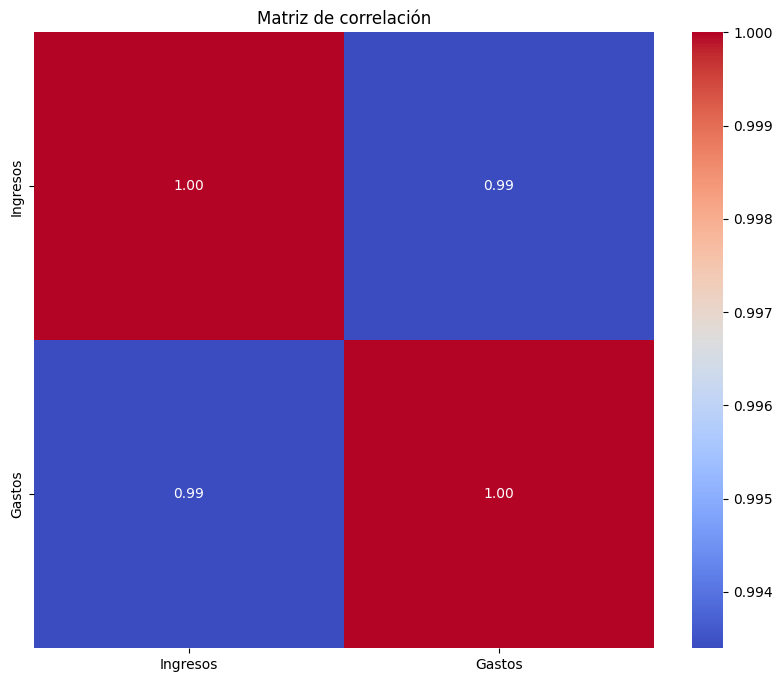

In [14]:
# [df].corr() para crear la matriz de correlación
corr_df = df_appol_limpio[columnas_numericas].corr()

# [df].heatmap() de seaborn y  otros metodos de matplotlib para el diagrama de calor.
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

Se puede apreciar una gran correlación entre las variables numericas de gastos e ingresos.